TP 4: CRUPNIK, LABORDA, REINKE

2. Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls, respectivamente. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.


In [2]:
#primero quiero descargar la base de datos limpia de ambos trimestres que usamos en el tp 3 para usarla en este TP
#df_unido2.to_csv('/Users/justinareinke/Downloads/TP3/baseTP3.csv', index=False)
#ya descargamos la base de datos como nos quedo del TP3 y tenemos la ruta del archivo para llamarla
#y desp unirlo con los nuevos datos

import pandas as pd
import pyreadstat

#bases tp3
#ahora pongo la ruta de mi archivo 
rutaJUSTI_basetp3 = "/Users/justinareinke/Downloads/TP3/baseTP3.csv"
#rutaLULI_basetp3 = "/Users/lulic/Downloads/TP3carpeta/base_TP3.csv"

#llamamos la base de datos 
baseTP3 = pd.read_csv(rutaJUSTI_basetp3)
#baseTP3 = pd.read_csv(rutaLULI_basetp3)
display(baseTP3)

/var/folders/6r/nbyhqmrx001_n7yxc4_k84y00000gn/T/ipykernel_27749/1393302259.py:15: DtypeWarning: Columns (0,12) have mixed types. Specify dtype option on import or set low_memory=False.
  baseTP3 = pd.read_csv(rutaJUSTI_basetp3)


,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,ipcf,deccfr,rdeccfr,gdeccfr,adeccfr,pondih,pj1_1,pj2_1,pj3_1,idimpp
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1.0,1.0,1.0,1.0,1.0,S,33.0,1810.0,...,0.000000e+00,12,12,12.0,12,0.0,NaN,NaN,NaN,NaN
1,TQSMNORWVHLLKQCDEIJAH00856914,2024,1.0,1.0,1.0,1.0,1.0,S,33.0,2368.0,...,5.000000e+05,9,9,9.0,9,3324.0,NaN,NaN,NaN,NaN
2,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1.0,1.0,1.0,1.0,1.0,S,33.0,1682.0,...,1.620000e+06,10,10,10.0,10,2575.0,NaN,NaN,NaN,NaN
3,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1.0,1.0,2.0,1.0,1.0,S,33.0,1866.0,...,0.000000e+00,12,12,12.0,12,0.0,NaN,NaN,NaN,NaN
4,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1.0,1.0,3.0,0.0,1.0,S,33.0,1866.0,...,0.000000e+00,12,12,12.0,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13219,288171,2004,1.0,1.0,3.0,0.0,1.0,S,33.0,1454.0,...,5.333333e+02,8,8,8.0,9,NaN,0.0,0.0,0.0,0.0
13220,288405,2004,1.0,1.0,1.0,1.0,1.0,S,33.0,1673.0,...,1.000000e+02,2,2,2.0,2,NaN,0.0,0.0,0.0,0.0
13221,288405,2004,1.0,1.0,2.0,1.0,1.0,S,33.0,1673.0,...,1.000000e+02,2,2,2.0,2,NaN,0.0,0.0,0.0,0.0
13222,288405,2004,1.0,1.0,3.0,1.0,1.0,S,33.0,1673.0,...,1.000000e+02,2,2,2.0,2,NaN,0.0,0.0,0.0,0.0


In [4]:
#ahora queremos dividir por año (ano4) las bases para despues unirla las bases de los hogares en los trimestres correspondientes
#filtramos por la variable ano4 para separar la baseTP3 por año 
baseTP3_2004 = baseTP3[baseTP3['ano4'] == 2004]
baseTP3_2024 = baseTP3[baseTP3['ano4'] == 2024]
#crea dos dataframes separados para cada año

In [6]:
#verificando que nos haya filtrado bien
check2004 = baseTP3_2004['ano4'].value_counts()
check2024 = baseTP3_2024['ano4'].value_counts()

check2004, check2024

(ano4
 2004    7516
 Name: count, dtype: int64,
 ano4
 2024    5708
 Name: count, dtype: int64)

In [8]:
#PASAMOS A LAS BASES DEL TP4

#primero copiamos las rutas 
rutaJUSTI_DTA = "/Users/justinareinke/Desktop/TP 4 archivos/Hogar_t404.dta"
rutaJUSTI_XLS = "/Users/justinareinke/Desktop/TP 4 archivos/usu_hogar_T124.xlsx"

#cargar base hogar 2004
hogar_2004, meta_2004 = pyreadstat.read_dta(rutaJUSTI_DTA)
display(hogar_2004)

#cargar base hogar 2024
hogar_2024 = pd.read_excel(rutaJUSTI_XLS, engine='openpyxl')
display(hogar_2024)

#rutaLULI_DTA = '/Users/lulic/Downloads/TP4carpeta/Hogar_t404.dta'
#rutaLULI_XLS = '/Users/lulic/Downloads/TP4carpeta/usu_hogar_T124.xlsx'

#cargar base hogar 2004
hogar_2004, meta_2004 = pyreadstat.read_dta(rutaJUSTI_DTA)
display(hogar_2004)

#cargar base hogar 2024
hogar_2024 = pd.read_excel(rutaJUSTI_XLS, engine='openpyxl')
display(hogar_2024)

#cargar base hogar 2004
#hogar_2004, meta_2004 = pyreadstat.read_dta(rutaLULI_DTA)
#display(hogar_2004)

#cargar base hogar 2024
#hogar_2024 = pd.read_excel(rutaLULI_XLS, engine='openpyxl')
#display(hogar_2024)

,CODUSU,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,125471,1.0,1.0,2004.0,4.0,43.0,S,2.0,579.0,2.0,...,08,,07,1.0,0.0,2.0,0.0,0.0,0.0,00000
1,125569,1.0,1.0,2004.0,4.0,43.0,S,2.0,591.0,1.0,...,09,,08,1.0,0.0,2.0,0.0,0.0,0.0,10000
2,125632,1.0,1.0,2004.0,4.0,43.0,S,2.0,425.0,1.0,...,08,,07,1.0,0.0,98.0,0.0,0.0,0.0,00000
3,126155,1.0,1.0,2004.0,4.0,43.0,S,2.0,406.0,2.0,...,03,,02,1.0,2.0,3.0,0.0,0.0,0.0,00000
4,126192,1.0,1.0,2004.0,4.0,43.0,S,2.0,203.0,1.0,...,09,,09,2.0,0.0,97.0,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13492,284624,1.0,1.0,2004.0,4.0,43.0,N,36.0,347.0,2.0,...,,06,05,2.0,0.0,98.0,0.0,0.0,0.0,00000
13493,285031,1.0,1.0,2004.0,4.0,43.0,N,36.0,216.0,1.0,...,,09,08,1.0,0.0,98.0,0.0,0.0,0.0,00000
13494,285120,1.0,1.0,2004.0,4.0,43.0,N,36.0,249.0,1.0,...,,06,06,2.0,0.0,4.0,0.0,0.0,0.0,00000
13495,285584,1.0,1.0,2004.0,4.0,43.0,N,36.0,151.0,1.0,...,,09,09,2.0,0.0,96.0,0.0,0.0,0.0,00100


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORPSHLOLMCDEFNFF00852337,2024,1,1,1,41,N,7,179,1,...,NaN,5.0,5,212,1,2,98,0,0,0
1,TQRMNOPRYHKOKTCDEFNFF00856789,2024,1,1,1,41,N,7,313,1,...,NaN,12.0,12,0,1,0,2,0,0,0
2,TQTMNORRSHKOKTCDEFNFF00856790,2024,1,1,1,41,N,7,286,1,...,NaN,8.0,9,401,2,0,1,0,0,0
3,TQRMNORRSHKOKTCDEFNFF00856791,2024,1,1,1,41,N,7,306,1,...,NaN,5.0,6,438,2,0,3,0,0,0
4,TQRMNOQTVHKLLLCDEFNFF00856792,2024,1,1,1,41,N,7,361,1,...,NaN,6.0,7,831,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,TQRMNOPXXHLKKUCDEFNFF00852324,2024,1,1,1,41,N,7,336,2,...,NaN,12.0,12,0,96,0,2,3,0,0
16100,TQRMNOPQTHKMLMCDEHMHF00861771,2024,1,1,1,42,N,26,141,1,...,NaN,3.0,2,156,97,0,1,2,0,0
16101,TQRMNOSYXHMMLNCDEFNFF00798999,2024,1,1,1,41,N,7,305,1,...,NaN,1.0,1,353,2,0,1,3,4,0
16102,TQRMNOPTSHLOLQCDEFNFF00852331,2024,1,1,1,41,N,7,331,1,...,NaN,6.0,7,420,97,0,98,0,0,0


,CODUSU,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,125471,1.0,1.0,2004.0,4.0,43.0,S,2.0,579.0,2.0,...,08,,07,1.0,0.0,2.0,0.0,0.0,0.0,00000
1,125569,1.0,1.0,2004.0,4.0,43.0,S,2.0,591.0,1.0,...,09,,08,1.0,0.0,2.0,0.0,0.0,0.0,10000
2,125632,1.0,1.0,2004.0,4.0,43.0,S,2.0,425.0,1.0,...,08,,07,1.0,0.0,98.0,0.0,0.0,0.0,00000
3,126155,1.0,1.0,2004.0,4.0,43.0,S,2.0,406.0,2.0,...,03,,02,1.0,2.0,3.0,0.0,0.0,0.0,00000
4,126192,1.0,1.0,2004.0,4.0,43.0,S,2.0,203.0,1.0,...,09,,09,2.0,0.0,97.0,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13492,284624,1.0,1.0,2004.0,4.0,43.0,N,36.0,347.0,2.0,...,,06,05,2.0,0.0,98.0,0.0,0.0,0.0,00000
13493,285031,1.0,1.0,2004.0,4.0,43.0,N,36.0,216.0,1.0,...,,09,08,1.0,0.0,98.0,0.0,0.0,0.0,00000
13494,285120,1.0,1.0,2004.0,4.0,43.0,N,36.0,249.0,1.0,...,,06,06,2.0,0.0,4.0,0.0,0.0,0.0,00000
13495,285584,1.0,1.0,2004.0,4.0,43.0,N,36.0,151.0,1.0,...,,09,09,2.0,0.0,96.0,0.0,0.0,0.0,00100


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORPSHLOLMCDEFNFF00852337,2024,1,1,1,41,N,7,179,1,...,NaN,5.0,5,212,1,2,98,0,0,0
1,TQRMNOPRYHKOKTCDEFNFF00856789,2024,1,1,1,41,N,7,313,1,...,NaN,12.0,12,0,1,0,2,0,0,0
2,TQTMNORRSHKOKTCDEFNFF00856790,2024,1,1,1,41,N,7,286,1,...,NaN,8.0,9,401,2,0,1,0,0,0
3,TQRMNORRSHKOKTCDEFNFF00856791,2024,1,1,1,41,N,7,306,1,...,NaN,5.0,6,438,2,0,3,0,0,0
4,TQRMNOQTVHKLLLCDEFNFF00856792,2024,1,1,1,41,N,7,361,1,...,NaN,6.0,7,831,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,TQRMNOPXXHLKKUCDEFNFF00852324,2024,1,1,1,41,N,7,336,2,...,NaN,12.0,12,0,96,0,2,3,0,0
16100,TQRMNOPQTHKMLMCDEHMHF00861771,2024,1,1,1,42,N,26,141,1,...,NaN,3.0,2,156,97,0,1,2,0,0
16101,TQRMNOSYXHMMLNCDEFNFF00798999,2024,1,1,1,41,N,7,305,1,...,NaN,1.0,1,353,2,0,1,3,4,0
16102,TQRMNOPTSHLOLQCDEFNFF00852331,2024,1,1,1,41,N,7,331,1,...,NaN,6.0,7,420,97,0,98,0,0,0


In [10]:
#Filtramos las observaciones para quedarse únicamente con las que corresponden a los aglomerados 32 (CABA) y 33 (GBA)
#según el código de la columna aglomerado.
#esto ya lo hicimos en el TP3 entonces solo falta hacerlo en las bases de hogar
aglomerados_caba_gba = [32, 33]
hogar_2004 = hogar_2004[hogar_2004['aglomerado'].isin(aglomerados_caba_gba)]
hogar_2024 = hogar_2024[hogar_2024['AGLOMERADO'].isin(aglomerados_caba_gba)]

In [12]:
#Cambiamos los nombres de las columnas a minúsculas para evitar problemas al hacer el merge.
baseTP3_2004.columns = baseTP3_2004.columns.str.lower()
hogar_2004.columns = hogar_2004.columns.str.lower()

#unimos las bases de hogar y baseTP3 todo de 2004 
df_2004 = pd.merge(baseTP3_2004, hogar_2004, on=['codusu', 'nro_hogar'], how='inner')
display(df_2004)

,codusu,ano4_x,trimestre_x,nro_hogar,componente,h15,region_x,mas_500_x,aglomerado_x,pondera_x,...,gdeccfr_y,pdeccfr,adeccfr_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph
0,125098,2004,1.0,1.0,1.0,1.0,1.0,S,32.0,1299.0,...,08,,06,1.0,0.0,97.0,0.0,0.0,0.0,00000
1,125397,2004,1.0,1.0,1.0,1.0,1.0,S,32.0,2018.0,...,05,,02,1.0,0.0,98.0,0.0,0.0,0.0,00010
2,126225,2004,1.0,1.0,1.0,1.0,1.0,S,32.0,2287.0,...,08,,06,2.0,0.0,97.0,0.0,0.0,0.0,10000
3,126225,2004,1.0,1.0,2.0,1.0,1.0,S,32.0,2287.0,...,08,,06,2.0,0.0,97.0,0.0,0.0,0.0,10000
4,126225,2004,1.0,1.0,3.0,1.0,1.0,S,32.0,2287.0,...,08,,06,2.0,0.0,97.0,0.0,0.0,0.0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,143666,2004,1.0,1.0,4.0,0.0,1.0,S,33.0,1671.0,...,02,,02,2.0,0.0,98.0,0.0,0.0,0.0,00000
430,143756,2004,1.0,1.0,1.0,1.0,1.0,S,33.0,1697.0,...,09,,10,2.0,0.0,1.0,0.0,0.0,0.0,00000
431,143756,2004,1.0,1.0,2.0,1.0,1.0,S,33.0,1697.0,...,09,,10,2.0,0.0,1.0,0.0,0.0,0.0,00000
432,143756,2004,1.0,1.0,3.0,1.0,1.0,S,33.0,1697.0,...,09,,10,2.0,0.0,1.0,0.0,0.0,0.0,00000


In [14]:
#repetimos todo este proceso para 2024
#Cambiamos los nombres de las columnas a minúsculas para evitar problemas al hacer el merge.
baseTP3_2024.columns = baseTP3_2024.columns.str.lower()
hogar_2024.columns = hogar_2024.columns.str.lower()

#unimos las bases de hogar y baseTP3 todo de 2004 
df_2024 = pd.merge(baseTP3_2024, hogar_2024, on=['codusu', 'nro_hogar'], how='inner')
display(df_2024)


# Revisar las columnas después del merge
#print("Columnas después del merge:", df_2024.columns)


,codusu,ano4_x,trimestre_x,nro_hogar,componente,h15,region_x,mas_500_x,aglomerado_x,pondera_x,...,gdeccfr_y,pdeccfr,adeccfr_y,pondih_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1.0,1.0,1.0,1.0,1.0,S,33.0,1810.0,...,12.0,NaN,12,0,1,0,96,0,0,0
1,TQSMNORWVHLLKQCDEIJAH00856914,2024,1.0,1.0,1.0,1.0,1.0,S,33.0,2368.0,...,9.0,NaN,9,3324,1,0,98,0,0,0
2,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1.0,1.0,1.0,1.0,1.0,S,33.0,1682.0,...,10.0,NaN,10,2575,1,0,98,0,0,0
3,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1.0,1.0,2.0,1.0,1.0,S,33.0,1866.0,...,12.0,NaN,12,0,1,0,98,0,0,0
4,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1.0,1.0,3.0,0.0,1.0,S,33.0,1866.0,...,12.0,NaN,12,0,1,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1.0,1.0,2.0,1.0,1.0,S,33.0,2818.0,...,12.0,NaN,12,0,1,2,3,4,0,0
5704,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1.0,1.0,2.0,2.0,1.0,S,33.0,3410.0,...,12.0,NaN,12,0,99,0,99,0,0,0
5705,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1.0,1.0,3.0,2.0,1.0,S,33.0,3410.0,...,12.0,NaN,12,0,99,0,99,0,0,0
5706,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1.0,1.0,4.0,2.0,1.0,S,33.0,3410.0,...,12.0,NaN,12,0,99,0,99,0,0,0


In [16]:
#ahora si unimos ambos dataframes de los dos años 
df = pd.concat([df_2004, df_2024])
display(df)

,codusu,ano4_x,trimestre_x,nro_hogar,componente,h15,region_x,mas_500_x,aglomerado_x,pondera_x,...,adeccfr_y,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih_x,pondih_y
0,125098,2004,1.0,1.0,1.0,1.0,1.0,S,32.0,1299.0,...,06,1.0,0.0,97.0,0.0,0.0,0.0,00000,NaN,NaN
1,125397,2004,1.0,1.0,1.0,1.0,1.0,S,32.0,2018.0,...,02,1.0,0.0,98.0,0.0,0.0,0.0,00010,NaN,NaN
2,126225,2004,1.0,1.0,1.0,1.0,1.0,S,32.0,2287.0,...,06,2.0,0.0,97.0,0.0,0.0,0.0,10000,NaN,NaN
3,126225,2004,1.0,1.0,2.0,1.0,1.0,S,32.0,2287.0,...,06,2.0,0.0,97.0,0.0,0.0,0.0,10000,NaN,NaN
4,126225,2004,1.0,1.0,3.0,1.0,1.0,S,32.0,2287.0,...,06,2.0,0.0,97.0,0.0,0.0,0.0,10000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1.0,1.0,2.0,1.0,1.0,S,33.0,2818.0,...,12,1.0,2.0,3.0,4.0,0.0,0.0,NaN,0.0,0.0
5704,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1.0,1.0,2.0,2.0,1.0,S,33.0,3410.0,...,12,99.0,0.0,99.0,0.0,0.0,0.0,NaN,0.0,0.0
5705,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1.0,1.0,3.0,2.0,1.0,S,33.0,3410.0,...,12,99.0,0.0,99.0,0.0,0.0,0.0,NaN,0.0,0.0
5706,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1.0,1.0,4.0,2.0,1.0,S,33.0,3410.0,...,12,99.0,0.0,99.0,0.0,0.0,0.0,NaN,0.0,0.0


3. Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones

In [18]:
#vemos que variables tienen datos faltantes
faltantes = df.isnull().sum()
print(faltantes[faltantes > 0])

ch05         434
ch14        2954
ch15_cod    5075
ch16_cod    6067
imputa      6105
            ... 
ideccfr     5708
pdeccfr     5708
idimph      5708
pondih_x     434
pondih_y     434
Length: 117, dtype: int64


In [20]:
#convertir los datos faltantes
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Si es numérica
        df[col] = df[col].fillna(df[col].median())  # Reemplazar con la mediana
    elif df[col].dtype == 'object':  # Si es categórica
        df[col] = df[col].fillna(df[col].mode()[0])  # Reemplazar con la moda

In [22]:
faltantes = df.isnull().sum()
print(faltantes[faltantes > 0])

pondih    6142
dtype: int64


In [24]:
# Lista de columnas de interés
columnas_interes = ["pp09c_esp", "idecocur", "pdecocur", "idecindr", "pdecindr", 
                    "idecifr_x", "pdecifr_x", "ideccfr_x", "pdeccfr_x", "pondih"]

# Mostrar todos los valores de cada columna
for col in columnas_interes:
    print(f"Valores en la columna {col}:")
    print(df[col])  # Mostrar todos los valores de la columna
    print("\n")  # Línea vacía para separar las salidas

Valores en la columna pp09c_esp:


KeyError: 'pp09c_esp'

In [26]:
# Reemplazar valores nulos por 0 solo en las columnas seleccionadas
columnas_a_corregir = ["pp09c_esp", "idecocur", "pdecocur", "idecindr", "pdecindr", 
                       "idecifr_x", "pdecifr_x", "ideccfr_x", "pdeccfr_x", "pondih"]
df.loc[:, columnas_a_corregir] = df[columnas_a_corregir].fillna(0)

KeyError: "['pp09c_esp', 'idecocur', 'pdecocur', 'idecindr', 'pdecindr', 'idecifr_x', 'pdecifr_x', 'ideccfr_x', 'pdeccfr_x'] not in index"

In [28]:
# Lista de columnas de interés
columnas_interes = ["pp09c_esp", "idecocur", "pdecocur", "idecindr", "pdecindr", 
                    "idecifr_x", "pdecifr_x", "ideccfr_x", "pdeccfr_x", "pondih"]

# Mostrar todos los valores de cada columna
for col in columnas_interes:
    print(f"Valores en la columna {col}:")
    print(df[col])  # Mostrar todos los valores de la columna
    print("\n")  # Línea vacía para separar las salidas

###Nacho, quiza tira error seguir corriendo el codigo.

Valores en la columna pp09c_esp:


KeyError: 'pp09c_esp'

In [30]:
#la columna pondih_y y pondih_x estan duplicadas. las tenemos que unir en pondih. 
#cuando hacemos el merge algunas columnas se duplican pero tienen los mismos valores. entonces verificamos uqe sean lo mismo, despues las unimos

# Verificar si las columnas pondih_x y pondih_y son iguales
columns_are_equal = df['pondih_x'].equals(df['pondih_y'])

print(f"¿Las columnas pondih_x y pondih_y son iguales? {columns_are_equal}")


¿Las columnas pondih_x y pondih_y son iguales? True


In [34]:
if columns_are_equal:
    # Si son iguales copiamos los valores de una de las columnas en pondih
    df['pondih'] = df['pondih_x']
else:
    # Si no son iguales, combinamos los valores no nulos de ambas columnas
    df['pondih'] = df['pondih_x'].combine_first(df['pondih_y'])

In [36]:
print(df['pondih'].head())  # Muestra las primeras filas

0    2472.5
1    2472.5
2    2472.5
3    2472.5
4    2472.5
Name: pondih, dtype: float64


In [38]:
print(df['pondih'].value_counts())
print(df['pondih'])

pondih
0.0       1671
2472.5     434
8403.0      14
1861.0      13
2358.0      12
          ... 
977.0        1
3026.0       1
3143.0       1
1550.0       1
1781.0       1
Name: count, Length: 1417, dtype: int64
0       2472.5
1       2472.5
2       2472.5
3       2472.5
4       2472.5
         ...  
5703       0.0
5704       0.0
5705       0.0
5706       0.0
5707       0.0
Name: pondih, Length: 6142, dtype: float64


In [40]:
# Iterar sobre todas las columnas del DataFrame
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Si la columna es numérica
        if not df[col].mode().empty:  # Verificar si la moda existe
            moda = df[col].mode()[0]  # Calcular la moda
            df[col] = df[col].fillna(moda)  # Reemplazar valores faltantes con la moda
    elif df[col].dtype == 'object':  # Si la columna es categórica
        df[col] = df[col].fillna('Desconocido')  # Reemplazar valores faltantes con "Desconocido"

In [42]:
# Lista de las columnas que deseas verificar
#estamos asumiendo que los valores que no tienen sentido del df del tp3 ya fueron eliminados
#miramos las variables en el diccionario de EPH y nos fijamos que variables no deberian ser negativas. 

columnas_montos = [ 'ch06', 'p47t']

# Verificar si hay valores negativos en las columnas seleccionadas y contar cuántos hay
for columna in columnas_montos:
    cantidad_negativos = (df[columna] < 0).sum()  # Cuenta los valores negativos
    if cantidad_negativos > 0:
        print(f"La columna {columna} tiene {cantidad_negativos} valores negativos.")
    else:
        print(f"No se encontraron valores negativos en la columna {columna}.")

No se encontraron valores negativos en la columna ch06.
No se encontraron valores negativos en la columna p47t.


In [44]:
# Eliminar filas con valores negativos en las columnas seleccionadas
for columna in columnas_montos:
    df = df[df[columna] >= 0]

In [46]:
# Verificar si hay valores negativos en las columnas seleccionadas y contar cuántos hay
for columna in columnas_montos:
    cantidad_negativos = (df[columna] < 0).sum()  # Cuenta los valores negativos
    if cantidad_negativos > 0:
        print(f"La columna {columna} tiene {cantidad_negativos} valores negativos.")
    else:
        print(f"No se encontraron valores negativos en la columna {columna}.")

No se encontraron valores negativos en la columna ch06.
No se encontraron valores negativos en la columna p47t.


4. Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).


In [48]:
#VARIABLE 1
# Crear la variable binaria de educación alta
#Una variable binaria que indica si el individuo completó al menos la secundaria.
# Diccionario de mapeo para los niveles educativos
mapa_nivel_ed = {
    1: "primario_incompleto",
    2: "primario_completo",
    3: "secundario_incompleto",
    4: "secundario_completo",
    5: "universitario_incompleto",
    6: "universitario_completo",
    7: "sin_instruccion",
    9: "ns_nr"  # No sabe/No responde
}

# Mapea los valores numéricos a texto
df["nivel_ed_texto"] = df["nivel_ed"].map(mapa_nivel_ed)

# Crear la variable binaria para educación alta
df["educacion_alta"] = df["nivel_ed_texto"].apply(
    lambda x: 1 if x in ["secundario_completo", "universitario_incompleto", "universitario_completo"] else 0
)

# Verificar los valores únicos en la columna de educación alta
print(df["educacion_alta"].value_counts())

educacion_alta
0    3272
1    2870
Name: count, dtype: int64


In [50]:
#VARIABLE 2
def definir_contexto(row):
    if row["pp02h"] == 1 and row["pp02e"] != 2:
        return "Buscador activo"
    elif row["pp02e"] in [3, 4]:
        return "Desalentado"
    elif row["pp02e"] in [1, 2]:
        return "Suspendido o en espera"
    elif row["pp02h"] == 2 and row["pp02i"] == 2:
        return "Inactivo laboral"
    else:
        return "Otro"

# Crear la nueva variable
df["contexto_laboral"] = df.apply(definir_contexto, axis=1)

# Revisar las primeras filas
print(df[[ "contexto_laboral"]].value_counts())

contexto_laboral      
Otro                      3560
Inactivo laboral          2529
Buscador activo             35
Desalentado                 12
Suspendido o en espera       6
Name: count, dtype: int64


In [52]:
#VARIABLE 3
# Combinar itf_x e itf_y para obtener el ingreso total familiar (itf_total)
df["itf_total"] = df["itf_x"].fillna(0) + df["itf_y"].fillna(0)

# Calcular el ingreso per cápita
df["ingreso_per_capita"] = df["itf_total"] / df["ix_tot"]

print(df[["ingreso_per_capita"]].describe())

       ingreso_per_capita
count        6.142000e+03
mean         3.659562e+05
std          8.139769e+05
min          0.000000e+00
25%          0.000000e+00
50%          1.866667e+05
75%          4.600000e+05
max          2.262467e+07


5. Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

In [54]:
# Estadísticas descriptivas de la variable 1: Educación alta
print("Estadísticas de 'educacion_alta':")
print(df["educacion_alta"].value_counts(normalize=True) * 100)  # Frecuencia relativa en porcentajes
print(df["educacion_alta"].value_counts())  # Frecuencia absoluta

Estadísticas de 'educacion_alta':
educacion_alta
0    53.27255
1    46.72745
Name: proportion, dtype: float64
educacion_alta
0    3272
1    2870
Name: count, dtype: int64


In [56]:
# Estadísticas descriptivas de la variable 2: Contexto laboral
print("\nEstadísticas de 'contexto_laboral':")
print(df["contexto_laboral"].value_counts())  # Frecuencia absoluta por contexto laboral
print(df["contexto_laboral"].value_counts(normalize=True) * 100)  # Frecuencia relativa en porcentajes



Estadísticas de 'contexto_laboral':
contexto_laboral
Otro                      3560
Inactivo laboral          2529
Buscador activo             35
Desalentado                 12
Suspendido o en espera       6
Name: count, dtype: int64
contexto_laboral
Otro                      57.961576
Inactivo laboral          41.175513
Buscador activo            0.569847
Desalentado                0.195376
Suspendido o en espera     0.097688
Name: proportion, dtype: float64


In [58]:
# Estadísticas descriptivas de la variable 3: Ingreso per cápita
print("\nEstadísticas descriptivas de 'ingreso_per_capita':")
print(df["ingreso_per_capita"].describe())  # Descripción estadística general de la variable


Estadísticas descriptivas de 'ingreso_per_capita':
count    6.142000e+03
mean     3.659562e+05
std      8.139769e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.866667e+05
75%      4.600000e+05
max      2.262467e+07
Name: ingreso_per_capita, dtype: float64


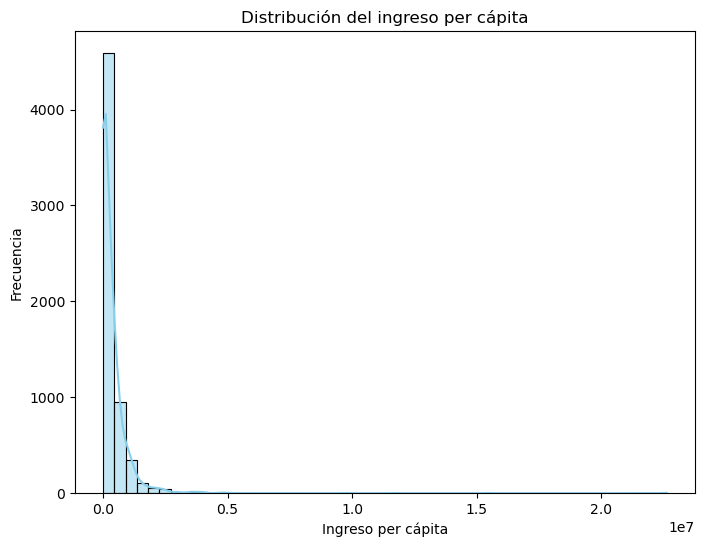

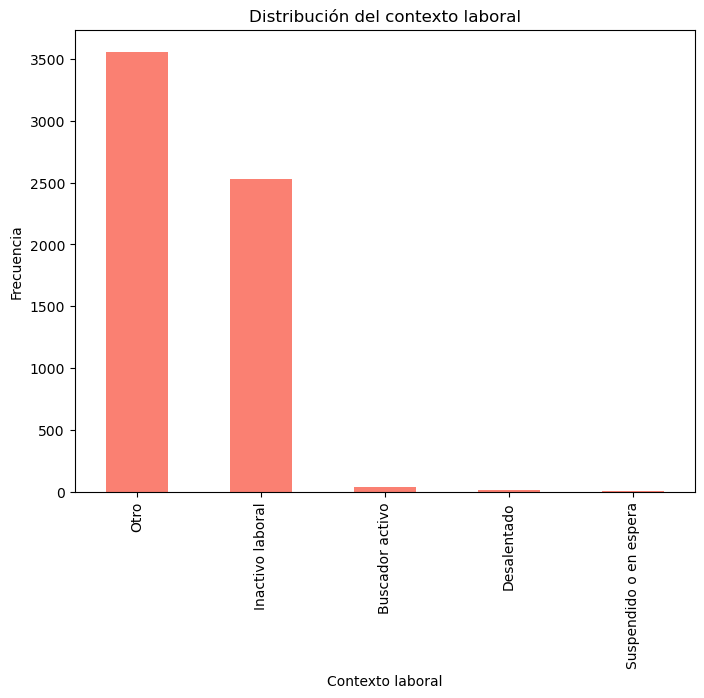

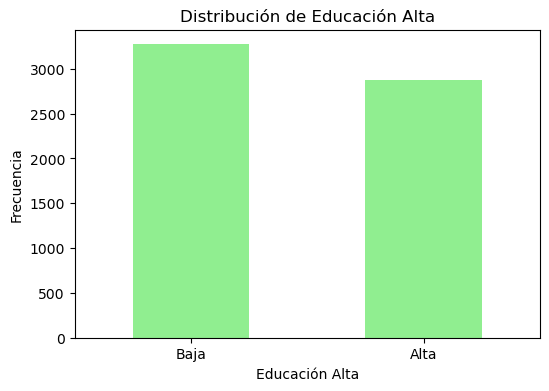

In [60]:
# Visualización opcional para enriquecer el análisis
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma del ingreso per cápita
plt.figure(figsize=(8, 6))
sns.histplot(df["ingreso_per_capita"], bins=50, kde=True, color="skyblue")
plt.title("Distribución del ingreso per cápita")
plt.xlabel("Ingreso per cápita")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de barras para contexto laboral
plt.figure(figsize=(8, 6))
df["contexto_laboral"].value_counts().plot(kind="bar", color="salmon")
plt.title("Distribución del contexto laboral")
plt.xlabel("Contexto laboral")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de barras para educación alta
plt.figure(figsize=(6, 4))
df["educacion_alta"].value_counts().plot(kind="bar", color="lightgreen")
plt.title("Distribución de Educación Alta")
plt.xticks([0, 1], labels=["Baja", "Alta"], rotation=0)
plt.xlabel("Educación Alta")
plt.ylabel("Frecuencia")
plt.show()

Parte II: Clasificación y regularización

El objetivo de esta parte del trabajo es nuevamente intentar predecir si una persona está desocupada o no. Esta vez utilizando distintas variables de características individuales y del hogar del encuestado. A su vez, incluiremos ejercicios de regularización y de validación cruzada.

Para cada año, partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos

In [62]:
#primero tengo que unir ano4 x e y en una sola columna. Para despues separar el df limpio basandote en esa columna y filtrando por año. 

##esto lo hice para unir ano4_x y ano4_y en una columna 
# Comparar las dos columnas
diferencias = df[df['ano4_x'] != df['ano4_y']]

if diferencias.empty:
    print("Las columnas 'ano4_x' y 'ano4_y' son equivalentes.")
else:
    print("Hay diferencias entre 'ano4_x' y 'ano4_y'.")
    print(diferencias)  # Mostrar las filas donde hay diferencias

Las columnas 'ano4_x' y 'ano4_y' son equivalentes.


In [64]:
df['ano4_x'] = df['ano4_x'].astype(float)
df['ano4_y'] = df['ano4_y'].astype(float)

if df['ano4_x'].equals(df['ano4_y']):
    print("Las columnas 'ano4_x' y 'ano4_y' son equivalentes después de normalizar.")
else:
    print("Las columnas 'ano4_x' y 'ano4_y' NO son equivalentes incluso después de normalizar.")


Las columnas 'ano4_x' y 'ano4_y' son equivalentes después de normalizar.


In [66]:
# Verificar que las columnas son equivalentes
if df['ano4_x'].equals(df['ano4_y']):
    # Crear una nueva columna combinada
    df['ano4'] = df['ano4_x']
    # Eliminar las columnas originales
    df = df.drop(columns=['ano4_x', 'ano4_y'])
    print("Columnas combinadas exitosamente en 'ano4'.")
else:
    print("Las columnas 'ano4_x' y 'ano4_y' no son equivalentes. No se pueden combinar.")

Columnas combinadas exitosamente en 'ano4'.


In [68]:
#ahora separar df limpio en años  para despues hacer la predicción

# Dividir el DataFrame basado en el valor de la columna 'ano4'
df_2004 = df[df['ano4'] == 2004]
df_2024 = df[df['ano4'] == 2024]

# Verificar las dimensiones de los nuevos DataFrames
print("Dimensiones de df_2004:", df_2004.shape)
print("Dimensiones de df_2024:", df_2024.shape)

Dimensiones de df_2004: (434, 263)
Dimensiones de df_2024: (5708, 263)


In [70]:
respondieron = df[df['estado'] != 0]  # Esto debe producir un DataFrame

In [72]:
# Guardar las bases como archivos separados en la misma carpeta que el script
#respondieron.to_csv('respondieron.csv', index=False)
#norespondieron.to_csv('norespondieron.csv', index=False)

respondieron = pd.read_csv('respondieron.csv')
norespondieron = pd.read_csv('norespondieron.csv')

# Contar personas que no respondieron
norespuesta = norespondieron.shape[0]
print("Cantidad de personas que no respondieron la condición de actividad:", norespuesta)

# Contar personas que respondieron
respondieron_cantidad = respondieron.shape[0]
print("Cantidad de personas que respondieron la condición de actividad:", respondieron_cantidad)

# Crear copias explícitas de los DataFrames por año
df_2004 = df[df['ano4'] == 2004].copy()
df_2024 = df[df['ano4'] == 2024].copy()

# Crear la columna 'respondieron' para indicar si 'estado' != 0 en los DataFrames por año
df_2004['respondieron'] = (df_2004['estado'] != 0).astype(int)
df_2024['respondieron'] = (df_2024['estado'] != 0).astype(int)

# Mostrar resultados de personas que respondieron por año
print("Cantidad de personas que respondieron en 2004:", df_2004['respondieron'].sum())
print("Cantidad de personas que respondieron en 2024:", df_2024['respondieron'].sum())

Cantidad de personas que no respondieron la condición de actividad: 42
Cantidad de personas que respondieron la condición de actividad: 6100
Cantidad de personas que respondieron en 2004: 433
Cantidad de personas que respondieron en 2024: 5667


In [74]:
# Crear una columna 'desocupado' para identificar desocupados en las bases de 2004 y 2024
df_2004['desocupado'] = (df_2004['estado'] == 2).astype(int)
df_2024['desocupado'] = (df_2024['estado'] == 2).astype(int)

#Creamos la base respondieron filtrando el df que tiene todos los valores jutnos.
# Filtrar las observaciones donde respondieron la condición de actividad (estado != 0)
# Filtrar por quienes respondieron (estado != 0) en cada año
respondieron_2004 = df_2004[df_2004['estado'] != 0]
respondieron_2024 = df_2024[df_2024['estado'] != 0]

# Dividir en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba) con semilla 101
from sklearn.model_selection import train_test_split

train_2004, test_2004 = train_test_split(respondieron_2004, test_size=0.3, random_state=101)
train_2024, test_2024 = train_test_split(respondieron_2024, test_size=0.3, random_state=101)

# Establecer variable dependiente (y) y variables independientes (X) para cada conjunto
# Para 2004
y_train_2004 = train_2004['desocupado']
X_train_2004 = train_2004.drop(columns=['desocupado'])

y_test_2004 = test_2004['desocupado']
X_test_2004 = test_2004.drop(columns=['desocupado'])

# Para 2024
y_train_2024 = train_2024['desocupado']
X_train_2024 = train_2024.drop(columns=['desocupado'])

y_test_2024 = test_2024['desocupado']
X_test_2024 = test_2024.drop(columns=['desocupado'])

# Agregar columna de unos (intercepto) a las matrices X
X_train_2004.insert(0, 'Intercept', 1)
X_test_2004.insert(0, 'Intercept', 1)

X_train_2024.insert(0, 'Intercept', 1)
X_test_2024.insert(0, 'Intercept', 1)

# Verificar dimensiones y mostrar resultados
print("Dimensiones X_train_2004:", X_train_2004.shape)
print("Dimensiones y_train_2004:", y_train_2004.shape)
print("Dimensiones X_test_2004:", X_test_2004.shape)
print("Dimensiones y_test_2004:", y_test_2004.shape)

print("Dimensiones X_train_2024:", X_train_2024.shape)
print("Dimensiones y_train_2024:", y_train_2024.shape)
print("Dimensiones X_test_2024:", X_test_2024.shape)
print("Dimensiones y_test_2024:", y_test_2024.shape)
print(f'El conjunto de entrenamiento tiene {len(X_train_2024)} observaciones.')
print(f'El conjunto de entrenamiento tiene {len(X_train_2004)} observaciones.')
print(f'El conjunto de test tiene {len(X_test_2024)} observaciones.')
print(f'El conjunto de test tiene {len(X_test_2004)} observaciones.')

Dimensiones X_train_2004: (303, 265)
Dimensiones y_train_2004: (303,)
Dimensiones X_test_2004: (130, 265)
Dimensiones y_test_2004: (130,)
Dimensiones X_train_2024: (3966, 265)
Dimensiones y_train_2024: (3966,)
Dimensiones X_test_2024: (1701, 265)
Dimensiones y_test_2024: (1701,)
El conjunto de entrenamiento tiene 3966 observaciones.
El conjunto de entrenamiento tiene 303 observaciones.
El conjunto de test tiene 1701 observaciones.
El conjunto de test tiene 130 observaciones.


Expliquen brevemente cómo elegirían λ por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba (test) para su elección

In [76]:
#queremos que sean numericas xtrain y xtest entonces las tranfomramos a dummies
X_train_2004 = pd.get_dummies(X_train_2004, drop_first=True)
X_test_2004 = pd.get_dummies(X_test_2004, drop_first=True)

# Reindexar para garantizar consistencia de columnas
X_test_2004 = X_test_2004.reindex(columns=X_train_2004.columns, fill_value=0)

In [78]:
non_numeric_columns = X_train_2024.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas en X_train_2024:", non_numeric_columns.tolist())

Columnas no numéricas en X_train_2024: ['codusu', 'mas_500_x', 'ch05', 'pp09a_esp', 'mas_500_y', 'iv1_esp', 'iv3_esp', 'iv7_esp', 'ii7_esp', 'ii8_esp', 'decifr_y', 'idecifr', 'rdecifr_y', 'gdecifr_y', 'pdecifr', 'adecifr_y', 'deccfr_y', 'ideccfr', 'rdeccfr_y', 'gdeccfr_y', 'pdeccfr', 'adeccfr_y', 'idimph', 'nivel_ed_texto', 'contexto_laboral']


In [80]:
# Identificar columnas no numéricas
non_numeric_columns = X_train_2024.select_dtypes(exclude=['number']).columns
#print("Columnas no numéricas en X_train_2024:", non_numeric_columns.head)
#puse como comentario ese print proque son muchas

# Procesar columnas booleanas
X_train_2024 = X_train_2024.astype({col: 'int' for col in X_train_2024.select_dtypes(include=['bool']).columns})
X_test_2024 = X_test_2024.astype({col: 'int' for col in X_test_2024.select_dtypes(include=['bool']).columns})

# Llenar valores nulos
X_train_2024 = X_train_2024.fillna(0)
X_test_2024 = X_test_2024.fillna(0)

# Codificar columnas categóricas
X_train_2024 = pd.get_dummies(X_train_2024, drop_first=True)
X_test_2024 = pd.get_dummies(X_test_2024, drop_first=True)

# Alinear columnas
X_test_2024 = X_test_2024.reindex(columns=X_train_2024.columns, fill_value=0)

# Verificar
assert X_train_2024.select_dtypes(include=['number']).shape[1] == X_train_2024.shape[1], "Aún hay columnas no numéricas en X_train_2024"
assert X_test_2024.select_dtypes(include=['number']).shape[1] == X_test_2024.shape[1], "Aún hay columnas no numéricas en X_test_2024"

/var/folders/6r/nbyhqmrx001_n7yxc4_k84y00000gn/T/ipykernel_27749/3926407860.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_2024 = X_train_2024.fillna(0)
/var/folders/6r/nbyhqmrx001_n7yxc4_k84y00000gn/T/ipykernel_27749/3926407860.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_2024 = X_test_2024.fillna(0)


AssertionError: Aún hay columnas no numéricas en X_train_2024

In [82]:
X_train_2024 = pd.get_dummies(X_train_2024, drop_first=True)
X_test_2024 = pd.get_dummies(X_test_2024, drop_first=True)

# Asegurar que ambas matrices tienen las mismas columnas
X_test_2024 = X_test_2024.reindex(columns=X_train_2024.columns, fill_value=0)

In [84]:
assert X_train_2024.select_dtypes(include=['number']).shape[1] == X_train_2024.shape[1], "Aún hay columnas no numéricas en X_train_2024"
assert X_test_2024.select_dtypes(include=['number']).shape[1] == X_test_2024.shape[1], "Aún hay columnas no numéricas en X_test_2024"

AssertionError: Aún hay columnas no numéricas en X_train_2024

In [86]:
assert X_train_2004.select_dtypes(include=['number']).shape[1] == X_train_2004.shape[1], "Hay columnas no numéricas en X_train_2004"
assert X_test_2004.select_dtypes(include=['number']).shape[1] == X_test_2004.shape[1], "Hay columnas no numéricas en X_test_2004"

AssertionError: Hay columnas no numéricas en X_train_2004

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_2024 = scaler.fit_transform(X_train_2024)
X_test_2024 = scaler.transform(X_test_2024)

In [90]:
#esta columna nos estaba geberando problemas
columns_to_drop = ['TQRMNOPUTHLONNCDEIJAH00855397'] 
# Convierte X_train_2024 y X_test_2024 en DataFrame 
X_train_2024 = pd.DataFrame(X_train_2024)
X_test_2024 = pd.DataFrame(X_test_2024)


X_train_2024 = X_train_2024.drop(columns=columns_to_drop, errors='ignore')
X_test_2024 = X_test_2024.drop(columns=columns_to_drop, errors='ignore')


In [92]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

# Estandarizamos todo el conjunto de datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_2004 = scaler.fit_transform(X_train_2004)
X_test_2004 = scaler.transform(X_test_2004)
X_train_2024 = scaler.fit_transform(X_train_2024)
X_test_2024 = scaler.transform(X_test_2024)


respondieron = pd.concat([respondieron, (respondieron['estado'] == 2).astype(int).rename('desocupado')], axis=1)

# Seleccionamos solo las filas que queremos usar como predictoras
variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'educacion_alta', 'ii7', 'iv3', 'iv5', 
            'iv8', 'iv6', 'itf_x', 'itf_y', 'ix_men10', 'vii2_3', 'ipcf_x', 'cat_inac']  #'estado', 'cat_inac' , 'ipcf_x', 'ipcf_y'
respondieron_2004 = respondieron[respondieron['ano4'] == 2004][variables + ['desocupado']]
respondieron_2024 = respondieron[respondieron['ano4'] == 2024][variables + ['desocupado']]


# Separar variable dependiente (y) e independientes (X)
y_2004 = respondieron_2004['desocupado']
X_2004 = respondieron_2004[variables]

y_2024 = respondieron_2024['desocupado']
X_2024 = respondieron_2024[variables]

# Convertir variables categóricas en dummy variables
X_2004 = pd.get_dummies(X_2004, drop_first=True)
X_2024 = pd.get_dummies(X_2024, drop_first=True)

# Asegurar consistencia de columnas
X_2024 = X_2024.reindex(columns=X_2004.columns, fill_value=0)

# Dividir en conjuntos de entrenamiento y prueba
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Validación cruzada para seleccionar alpha (lambda)
alphas = [0.01, 0.1, 1, 10, 100]  # Valores candidatos para alpha

ridge = Ridge(solver='svd')
param_grid = {'alpha': alphas}

# GridSearchCV para encontrar el mejor alpha
grid_search_2004 = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_2004.fit(X_train_2004, y_train_2004)

best_alpha_2004 = grid_search_2004.best_params_['alpha']
print(f"Mejor valor de alpha para 2004: {best_alpha_2004}")

# Entrenar modelo final con el mejor alpha
ridge_final_2004 = Ridge(alpha=best_alpha_2004)
ridge_final_2004.fit(X_train_2004, y_train_2004)
# Evaluar el modelo en el conjunto de prueba
y_pred_2004 = ridge_final_2004.predict(X_test_2004)
mse_2004 = mean_squared_error(y_test_2004, y_pred_2004)
print(f"MSE en el conjunto de prueba para 2004: {mse_2004}")

# Repetir el proceso para 2024
grid_search_2024 = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_2024.fit(X_train_2024, y_train_2024)

best_alpha_2024 = grid_search_2024.best_params_['alpha']
print(f"Mejor valor de alpha para 2024: {best_alpha_2024}")

ridge_final_2024 = Ridge(alpha=best_alpha_2024)
ridge_final_2024.fit(X_train_2024, y_train_2024)

y_pred_2024 = ridge_final_2024.predict(X_test_2024)
mse_2024 = mean_squared_error(y_test_2024, y_pred_2024)
print(f"MSE en el conjunto de prueba para 2024: {mse_2024}")

Mejor valor de alpha para 2004: 100
MSE en el conjunto de prueba para 2004: 0.06661284514322904
Mejor valor de alpha para 2024: 100
MSE en el conjunto de prueba para 2024: 0.047885534888234126


In [94]:
#quiero verificar las variables que correlacionan muy alto con desocupado para eliminarlas del modelo asi las curva roc no me da tan perfecta
#ya elimine pph02 desp contexto laboral que tenia pph02. 
#aquellas columnas que estan muy correlacionadas con la variable respuesta (desoucpado) no estaran incluido en las variables predictoras. 

# Filtrar solo las columnas numéricas
numeric_columns = respondieron.select_dtypes(include=['number'])

# Calcular correlaciones
correlations = numeric_columns.corr()['desocupado'].sort_values(ascending=False)
print(correlations)

desocupado      1.000000
pp10c           0.955138
pp02c8          0.939795
pp02c4          0.936217
pp02c7          0.932684
                  ...   
v19_am               NaN
pj2_1                NaN
realizada            NaN
region_y             NaN
respondieron         NaN
Name: desocupado, Length: 246, dtype: float64


En validación cruzada, ¿cuáles son las implicancias de usar un k muy
pequeño o uno muy grande? Cuando k = n (con n el número de
muestras), ¿cuántas veces se estima el modelo?

In [96]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut

# Convertir DataFrame a NumPy array para compatibilidad con LeaveOneOut
X_train_2004_np = X_train_2004.values
y_train_2004_np = y_train_2004.values

loo = LeaveOneOut()
alphas = [0.01, 0.1, 1, 10, 100]
mse_list = []

# Probar diferentes valores de alpha con LOOCV
for alpha in alphas:
    mse_alpha = []
    for train_index, test_index in loo.split(X_train_2004_np):
        # Usar índices para dividir los datos
        X_train, X_test = X_train_2004_np[train_index], X_train_2004_np[test_index]
        y_train, y_test = y_train_2004_np[train_index], y_train_2004_np[test_index]
        
        # Ajustar modelo Ridge
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        mse_alpha.append(mean_squared_error(y_test, y_pred))
    
    mse_list.append(np.mean(mse_alpha))

# Seleccionamos el mejor alpha basado en el menor ECM promedio
best_alpha_loocv = alphas[np.argmin(mse_list)]
print("Con LOOCV (k=n):")
print("El mejor alpha:", best_alpha_loocv)
print("ECM promedio con LOOCV:", min(mse_list))

# Ajustar el modelo final con el mejor alpha encontrado
ridge_loocv = Ridge(alpha=best_alpha_loocv)
ridge_loocv.fit(X_train_2004, y_train_2004)

# Predicción en el conjunto de prueba y error cuadrático medio
ridge_pred_loocv = ridge_loocv.predict(X_test_2004)
ecm_loocv = mean_squared_error(y_test_2004, ridge_pred_loocv)
print("ECM final con LOOCV:", ecm_loocv)

Con LOOCV (k=n):
El mejor alpha: 100
ECM promedio con LOOCV: 0.04773699338583805
ECM final con LOOCV: 0.06661284514322904


4. Para regresión logística, implementen la penalidad, L1 como la de
LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando
la opción penalty y reporten la matriz de confusión, la curva ROC, los
valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron los
resultados con respecto al TP3? ¿La performance de regresión logística
con regularización es mejor o peor?


Resultados para el año 2004:


Regresión logística con penalidad L1:
Matriz de confusión:
[[119   1]
 [  9   1]]
Accuracy: 0.9231
AUC: 0.8183


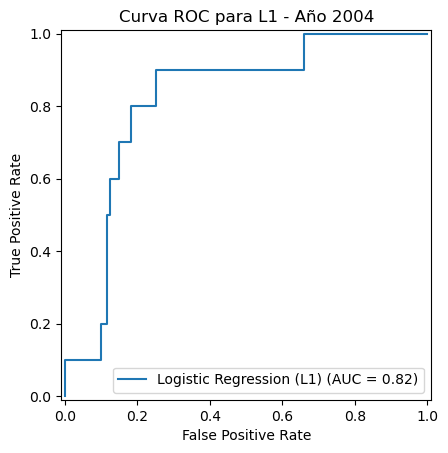


Regresión logística con penalidad L2:
Matriz de confusión:
[[119   1]
 [  9   1]]
Accuracy: 0.9231
AUC: 0.7883


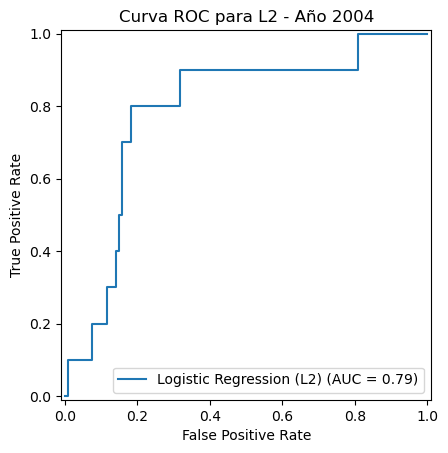


Resultados para el año 2024:


Regresión logística con penalidad L1:
Matriz de confusión:
[[1604    3]
 [  94    0]]
Accuracy: 0.9430
AUC: 0.9050


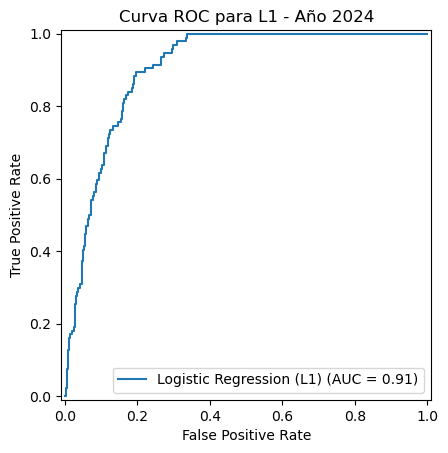


Regresión logística con penalidad L2:
Matriz de confusión:
[[1605    2]
 [  94    0]]
Accuracy: 0.9436
AUC: 0.9048


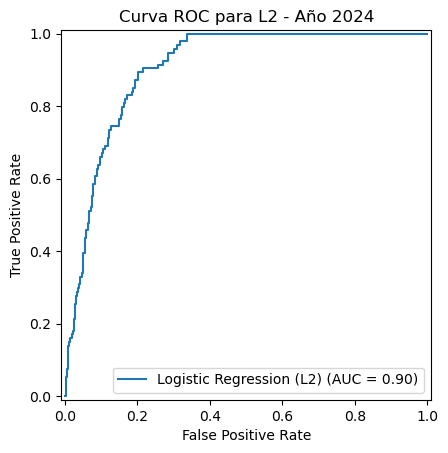

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocesamiento: Estandarización
scaler = StandardScaler()
X_train_2004_transformed = scaler.fit_transform(X_train_2004)
X_test_2004_transformed = scaler.transform(X_test_2004)
X_train_2024_transformed = scaler.fit_transform(X_train_2024)
X_test_2024_transformed = scaler.transform(X_test_2024)
# Penalidades y configuración de λ (lambda)
penalties = ['l1', 'l2']
lambda_value = 1  # Corresponde a C=1/λ
results = {}

for year, (X_train, X_test, y_train, y_test) in {
    2004: (X_train_2004_transformed, X_test_2004_transformed, y_train_2004, y_test_2004),
    2024: (X_train_2024_transformed, X_test_2024_transformed, y_train_2024, y_test_2024),
}.items():
    print(f"\nResultados para el año {year}:\n")
    results[year] = {}
    
    for penalty in penalties:
        print(f"\nRegresión logística con penalidad {penalty.upper()}:")

        # Configurar el modelo
        logistic_model = LogisticRegression(penalty=penalty, C=1 / lambda_value, solver='liblinear', max_iter=1000)
        logistic_model.fit(X_train, y_train)
        

        # Predicciones
        y_pred = logistic_model.predict(X_test)
        y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
        
        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        print("Matriz de confusión:")
        print(cm)
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Curva ROC y AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        print(f"AUC: {roc_auc:.4f}")
        
        # Graficar la curva ROC
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f"Logistic Regression ({penalty.upper()})").plot()
        plt.title(f"Curva ROC para {penalty.upper()} - Año {year}")
        plt.show()
          
        # Guardar resultados
        results[year][penalty] = {
            "Confusion Matrix": cm,
            "Accuracy": accuracy,
            "AUC": roc_auc
        }

5. Realicen un barrido en = 10^n λ con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen
10-fold CV para elegir el λ óptimo en regresión logística con Ridge y con
LASSO. ¿Qué λ seleccionó en cada caso? Usando la librería de seaborn,
generen box plot mostrando la distribución del error de predicción para
cada λ. Cada box debe corresponder a un valor de λ y contener como
observaciones el error medio de validación (MSE) para cada partición.
Además, para la regularización LASSO, generen un line plot del
promedio de la proporción de variables ignoradas por el modelo en
función de λ (como vieron en el tutorial 10), es decir la proporción de
variables para las cuales el coeficiente asociado es cero.

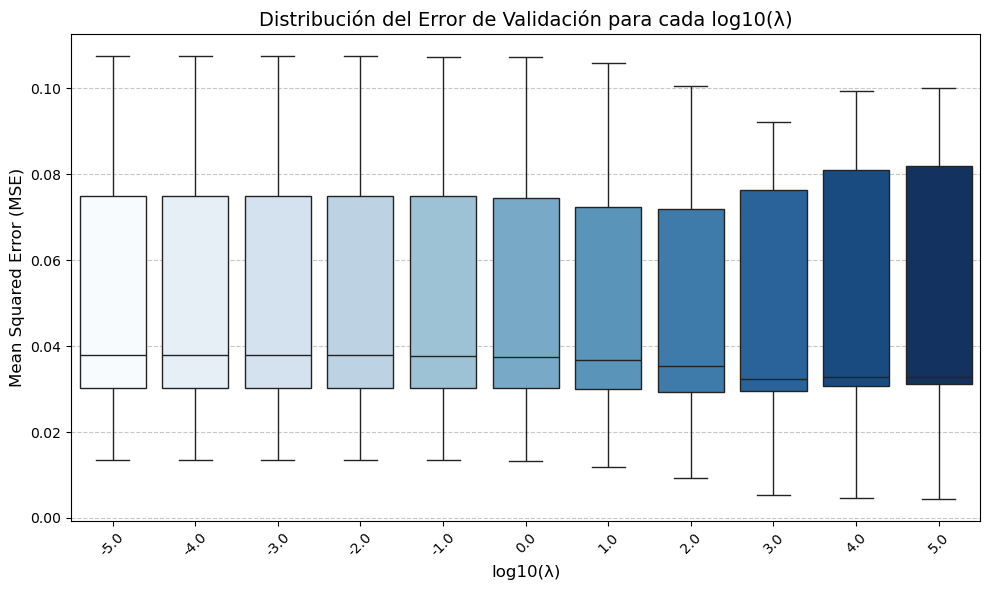

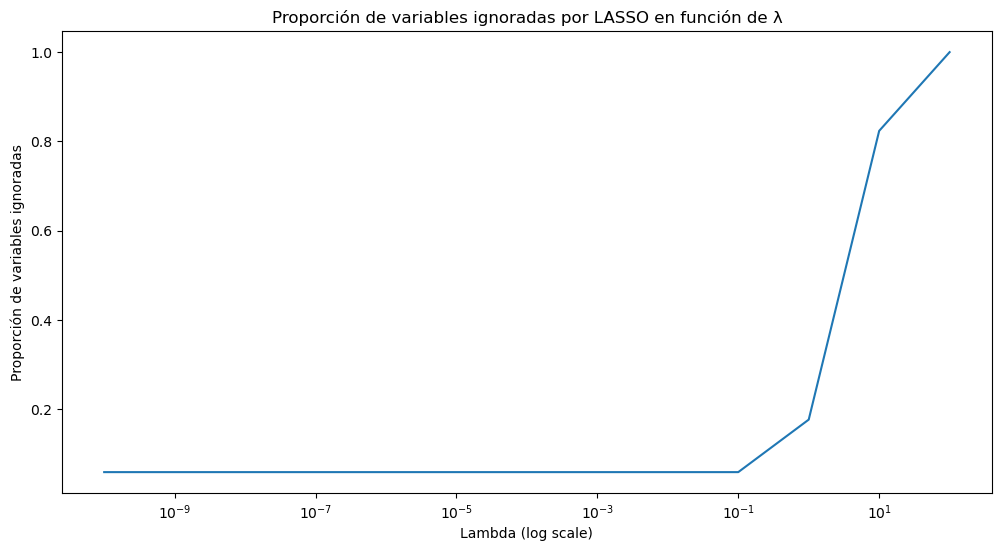

λ óptimo para Ridge: 10.0
λ óptimo para LASSO: 1.0


In [100]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_2004)

# Configuración de lambdas
n_values = np.arange(-10, 3, dtype=float)  # Explora valores de -10 a 2
lambdas = 10 ** n_values

# Inicialización de variables para resultados
ridge_results = []
lasso_results = []
lasso_zero_proportions = []

# Preprocesamiento
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_2004)
y_train = y_train_2004

# Configuración de validación cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)


# Barrido para Ridge y LASSO
for lam in lambdas:
    # Ridge
    ridge_model = LogisticRegression(penalty='l2', C=1/lam, solver='liblinear', max_iter=5000)
    ridge_cv_scores = cross_val_score(ridge_model, X_train_transformed, y_train, cv=kf, scoring='neg_mean_squared_error')
    ridge_results.append({
        'lambda': lam,
        'mean_error': -np.mean(ridge_cv_scores),
        'model': 'Ridge'
    })
 # LASSO
    lasso_model = LogisticRegression(penalty='l1', C=1/lam, solver='liblinear', max_iter=5000)
    lasso_cv_scores = cross_val_score(lasso_model, X_train_transformed, y_train, cv=kf, scoring='neg_mean_squared_error')
    lasso_results.append({
        'lambda': lam,
        'mean_error': -np.mean(lasso_cv_scores),
        'model': 'LASSO'
    })
    
    # Proporción de variables ignoradas para LASSO
    lasso_model.fit(X_train_transformed, y_train)
    zero_proportion = np.mean(lasso_model.coef_ == 0)
    lasso_zero_proportions.append({
        'lambda': lam,
        'zero_proportion': zero_proportion
    })

# Combinar resultados
results_df = pd.DataFrame(ridge_results + lasso_results)
lasso_zero_df = pd.DataFrame(lasso_zero_proportions)


# Configuración de valores de λ (alpha)
alphas = [10**n for n in range(-5, 6)]  # Barrido de valores entre 10^-5 y 10^5
mse_scores = []  # Para almacenar los MSE

# Cálculo del MSE
# Iterar sobre cada valor de α
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Creación del modelo Ridge con penalización alpha
    # Validación cruzada (10-fold CV)
    scores = cross_val_score(ridge, X_train_2004, y_train_2004, 
                             cv=10, scoring='neg_mean_squared_error')  # MSE negativo
    # Guardamos resultados como MSE positivos
    mse_scores.extend([(-score, np.log10(alpha)) for score in scores])

# Convertimos los resultados a un DataFrame
mse_df = pd.DataFrame(mse_scores, columns=['MSE', 'log10_lambda'])

# Creamos el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=mse_df, x='log10_lambda', y='MSE', palette='Blues', hue='log10_lambda', dodge=False, legend=False)

# Personalización del gráfico
plt.title('Distribución del Error de Validación para cada log10(λ)', fontsize=14)
plt.xlabel('log10(λ)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Este gráfico muestra cómo el MSE varía según el nivel de regularización (λ).
# Se puede identificar el rango óptimo de regularización en función de errores bajos y estabilidad.


# Gráfico 2: Line plot de proporción de variables ignoradas (LASSO)
plt.figure(figsize=(12, 6))
sns.lineplot(x='lambda', y='zero_proportion', data=lasso_zero_df)
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Proporción de variables ignoradas")
plt.title("Proporción de variables ignoradas por LASSO en función de λ")
plt.show()
# Selección de λ óptimos
ridge_optimal_lambda = results_df[results_df['model'] == 'Ridge'].loc[
    results_df[results_df['model'] == 'Ridge']['mean_error'].idxmin(), 'lambda'
]
lasso_optimal_lambda = results_df[results_df['model'] == 'LASSO'].loc[
    results_df[results_df['model'] == 'LASSO']['mean_error'].idxmin(), 'lambda'
]

print(f"λ óptimo para Ridge: {ridge_optimal_lambda}")
print(f"λ óptimo para LASSO: {lasso_optimal_lambda}")

In [102]:
# Convertir los resultados de Ridge y LASSO a DataFrames separados
ridge_df = results_df[results_df['model'] == 'Ridge']
lasso_df = results_df[results_df['model'] == 'LASSO']

# Selección de λ óptimos
ridge_optimal_lambda = ridge_df.loc[ridge_df['mean_error'].idxmin(), 'lambda']
lasso_optimal_lambda = lasso_df.loc[lasso_df['mean_error'].idxmin(), 'lambda']

print(f"λ óptimo para Ridge: {ridge_optimal_lambda}")
print(f"λ óptimo para LASSO: {lasso_optimal_lambda}")


λ óptimo para Ridge: 10.0
λ óptimo para LASSO: 1.0


6. En el caso del valor óptimo de λ para LASSO encontrado en el inciso
anterior, ¿qué variables fueron descartadas? ¿Son las que hubieran
esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de la
Parte I?

In [104]:
from sklearn.linear_model import Lasso

# Valor óptimo de λ para LASSO encontrado anteriormente
lasso_optimal_lambda = 1.0  

# Ajustar el modelo de LASSO con el λ óptimo
lasso_model = Lasso(alpha=lasso_optimal_lambda, max_iter=10000)
lasso_model.fit(X_train_2004, y_train_2004)

# Extraer los coeficientes del modelo
coefficients = pd.Series(lasso_model.coef_, index=X_train_2004.columns)

# Identificar variables descartadas (coeficientes iguales a 0)
discarded_variables = coefficients[coefficients == 0].index.tolist()

# Variables seleccionadas (coeficientes diferentes de 0)
selected_variables = coefficients[coefficients != 0].index.tolist()

print("Variables descartadas con LASSO:")
print(discarded_variables)

print("\nVariables seleccionadas con LASSO:")
print(selected_variables)


Variables descartadas con LASSO:
['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'educacion_alta', 'ii7', 'iv3', 'iv5', 'iv8', 'iv6', 'ix_men10', 'vii2_3', 'ipcf_x', 'cat_inac']

Variables seleccionadas con LASSO:
['itf_x', 'itf_y']


7. Elijan alguno de los modelos de regresión logística donde hayan probado
distintos parámetros de regularización y comenten: Compare los
resultados de 2004 versus 2024, ¿qué método de regularización funcionó
mejor: Ridge o LASSO? ¿LASSO hizo una selección distinta de
predictores en 2004 versus 2024? Comenten mencionando el error
cuadrático medio (MSE)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Valores óptimos de λ (C = 1/λ)
ridge_optimal_C = 1 / ridge_optimal_lambda  # Calculado previamente
lasso_optimal_C = 1 / lasso_optimal_lambda  # Calculado previamente

# Resultados para almacenar
results_comparison = {}

for year, (X_train, X_test, y_train, y_test) in {
    2004: (X_train_2004, X_test_2004, y_train_2004, y_test_2004),
    2024: (X_train_2024, X_test_2024, y_train_2024, y_test_2024),
}.items():
    results_comparison[year] = {}
    
    # Ridge
    ridge_model = LogisticRegression(penalty='l2', C=ridge_optimal_C, solver='liblinear', max_iter=1000)
    ridge_model.fit(X_train, y_train)
    ridge_preds = ridge_model.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_preds)
    results_comparison[year]['Ridge'] = {
        'MSE': ridge_mse,
        'Coefficients': pd.Series(ridge_model.coef_.flatten(), index=X_train.columns)
    }
    
    # LASSO
    lasso_model = LogisticRegression(penalty='l1', C=lasso_optimal_C, solver='liblinear', max_iter=1000)
    lasso_model.fit(X_train, y_train)
    lasso_preds = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_preds)
    results_comparison[year]['LASSO'] = {
        'MSE': lasso_mse,
        'Coefficients': pd.Series(lasso_model.coef_.flatten(), index=X_train.columns)
    }

# Comparar los resultados
for year in results_comparison:
    print(f"\nResultados para {year}:")
    print("Ridge:")
    print(f" - MSE: {results_comparison[year]['Ridge']['MSE']}")
    print("LASSO:")
    print(f" - MSE: {results_comparison[year]['LASSO']['MSE']}")

# Comparación de predictores seleccionados por LASSO
selected_2004 = results_comparison[2004]['LASSO']['Coefficients'][results_comparison[2004]['LASSO']['Coefficients'] != 0].index.tolist()
selected_2024 = results_comparison[2024]['LASSO']['Coefficients'][results_comparison[2024]['LASSO']['Coefficients'] != 0].index.tolist()

print("\nPredictores seleccionados por LASSO en 2004:")
print(selected_2004)
print("\nPredictores seleccionados por LASSO en 2024:")
print(selected_2024)

# Comparar predictores entre 2004 y 2024
common_predictors = set(selected_2004).intersection(selected_2024)
diff_2004_2024 = set(selected_2004).symmetric_difference(selected_2024)

print("\nPredictores comunes entre 2004 y 2024:")
print(common_predictors)
print("\nPredictores diferentes entre 2004 y 2024:")
print(diff_2004_2024)


Resultados para 2004:
Ridge:
 - MSE: 0.07692307692307693
LASSO:
 - MSE: 0.06923076923076923

Resultados para 2024:
Ridge:
 - MSE: 0.05526161081716637
LASSO:
 - MSE: 0.0564373897707231

Predictores seleccionados por LASSO en 2004:
['ch04', 'ch06', 'ch08', 'nivel_ed', 'educacion_alta', 'ii7', 'iv6', 'itf_x', 'itf_y', 'ipcf_x', 'cat_inac']

Predictores seleccionados por LASSO en 2024:
['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'educacion_alta', 'ii7', 'iv3', 'iv6', 'itf_x', 'itf_y', 'ix_men10', 'vii2_3', 'ipcf_x', 'cat_inac']

Predictores comunes entre 2004 y 2024:
{'ii7', 'iv6', 'itf_x', 'itf_y', 'ch04', 'cat_inac', 'ch06', 'ch08', 'educacion_alta', 'ipcf_x', 'nivel_ed'}

Predictores diferentes entre 2004 y 2024:
{'ch07', 'ix_men10', 'iv3', 'vii2_3'}
